In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('TG_STAID002759.txt', skiprows=19)

In [3]:
df.head()

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [4]:
df.columns= ['id','date','temp','quality']

In [5]:
df.head()

,id,date,temp,quality
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [6]:
df.drop(['id'],axis=1, inplace=True)

In [7]:
df.head()

,date,temp,quality
0,19510101,-40,0
1,19510102,-14,0
2,19510103,-12,0
3,19510104,4,0
4,19510105,25,0


In [8]:
df.drop(['quality'],axis=1, inplace=True)

In [9]:
df.head()

,date,temp
0,19510101,-40
1,19510102,-14
2,19510103,-12
3,19510104,4
4,19510105,25


In [10]:
df['date']=df['date'].astype(str)

In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df=df.set_index('date')

In [13]:
df.head()

,temp
date,
1951-01-01,-40
1951-01-02,-14
1951-01-03,-12
1951-01-04,4
1951-01-05,25


In [14]:
df['temp']=df['temp']*0.1

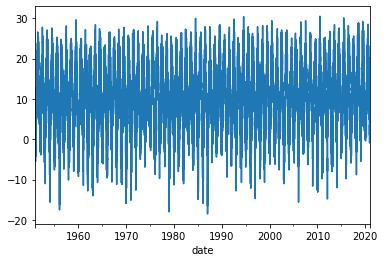

In [15]:
df['temp'].plot()

In [16]:
df_train=df.loc['1979':'2019']

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14975 entries, 1979-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    14975 non-null  float64
dtypes: float64(1)
memory usage: 234.0 KB


In [18]:
df_train.to_csv('temp_train.csv')

In [19]:
df_test=df.loc['2020']

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [21]:
df_test.to_csv('temp_test.csv')

In [22]:
df_train['timestep'] = list(range(len(df_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_train.head()

,temp,timestep
date,,
1979-01-01,-11.9,0
1979-01-02,-9.3,1
1979-01-03,-7.8,2
1979-01-04,-9.6,3
1979-01-05,-9.9,4


In [24]:
X=df_train[['timestep']]
y=df_train[['temp']]

In [25]:
X

,timestep
date,
1979-01-01,0
1979-01-02,1
1979-01-03,2
1979-01-04,3
1979-01-05,4
...,...
2019-12-27,14970
2019-12-28,14971
2019-12-29,14972


# **Baseline model (Trend)**

---



In [26]:
model = LinearRegression()
reg=model.fit(X,y)

In [27]:
# add the predicted linear trend to the dataframe
df_train['trend'] = reg.predict(X)
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,temp,timestep,trend
date,,,
1979-01-01,-11.9,0,9.119150
1979-01-02,-9.3,1,9.119284
1979-01-03,-7.8,2,9.119419
1979-01-04,-9.6,3,9.119554
1979-01-05,-9.9,4,9.119689


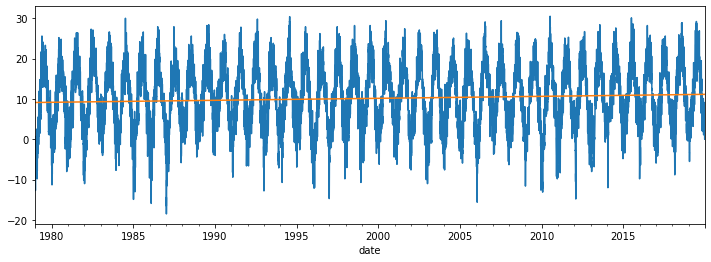

In [28]:
# Bsseline model prediction (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)
df_train['trend'].plot(ax=ax)

**Trend from linear reg model**

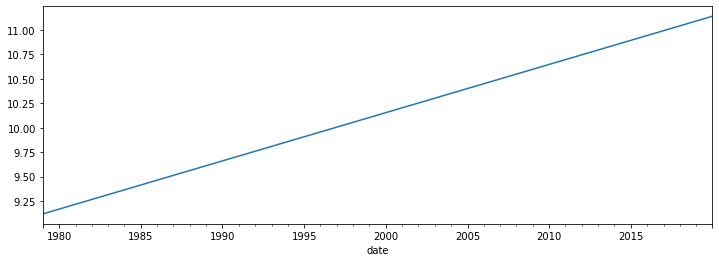

In [29]:
# Trend 
fig, ax = plt.subplots(figsize=(12, 4))
df_train['trend'].plot(ax=ax)

# **Modeling the seasonality**

In [30]:
# preprocess data first
df_train['month'] = df_train.index.month
df_train['month_name'] = df_train.index.month_name()
df_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temp,timestep,trend,month,month_name
date,,,,,
1979-01-01,-11.9,0,9.119150,1,January
1979-01-02,-9.3,1,9.119284,1,January
1979-01-03,-7.8,2,9.119419,1,January
1979-01-04,-9.6,3,9.119554,1,January
1979-01-05,-9.9,4,9.119689,1,January


In [31]:
pd.get_dummies(df_train[['temp', 'timestep', 'month_name', 'trend']], prefix = '', prefix_sep='')

,temp,timestep,trend,April,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,0,0,0,0,1,0,0,0,0,0,0,0
1979-01-02,-9.3,1,9.119284,0,0,0,0,1,0,0,0,0,0,0,0
1979-01-03,-7.8,2,9.119419,0,0,0,0,1,0,0,0,0,0,0,0
1979-01-04,-9.6,3,9.119554,0,0,0,0,1,0,0,0,0,0,0,0
1979-01-05,-9.9,4,9.119689,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,3.1,14970,11.138808,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-28,1.3,14971,11.138943,0,0,1,0,0,0,0,0,0,0,0,0
2019-12-29,0.0,14972,11.139078,0,0,1,0,0,0,0,0,0,0,0,0


In [32]:
df_train = pd.get_dummies(df_train, prefix='', prefix_sep='', drop_first=True)

df_train.head()

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,1,0,0,0,1,0,0,0,0,0,0,0
1979-01-02,-9.3,1,9.119284,1,0,0,0,1,0,0,0,0,0,0,0
1979-01-03,-7.8,2,9.119419,1,0,0,0,1,0,0,0,0,0,0,0
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0


In [33]:
# new model data prepration
#X = df_train.drop(columns=['temp', 'trend'])
X = df_train.drop(columns=['temp','trend','month'])
X.head()

,timestep,August,December,February,January,July,June,March,May,November,October,September
date,,,,,,,,,,,,
1979-01-01,0,0,0,0,1,0,0,0,0,0,0,0
1979-01-02,1,0,0,0,1,0,0,0,0,0,0,0
1979-01-03,2,0,0,0,1,0,0,0,0,0,0,0
1979-01-04,3,0,0,0,1,0,0,0,0,0,0,0
1979-01-05,4,0,0,0,1,0,0,0,0,0,0,0


In [34]:
#new linear reg model including seasonality
regm_trend_seasonal=LinearRegression()
regm_trend_seasonal.fit(X,y)

LinearRegression()

In [35]:
df_train['trend_seasonal'] = regm_trend_seasonal.predict(X)
df_train.head()

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal
date,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,1,0,0,0,1,0,0,0,0,0,0,0,-0.228877
1979-01-02,-9.3,1,9.119284,1,0,0,0,1,0,0,0,0,0,0,0,-0.228750
1979-01-03,-7.8,2,9.119419,1,0,0,0,1,0,0,0,0,0,0,0,-0.228624
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0,-0.228497
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0,-0.228371


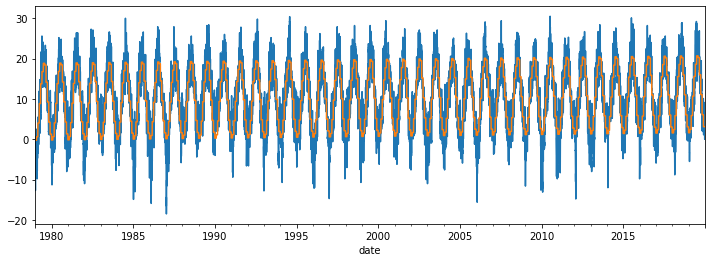

In [36]:
# Bsseline model prediction updated seasonality included (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].plot(ax=ax)
df_train['trend_seasonal'].plot(ax=ax)

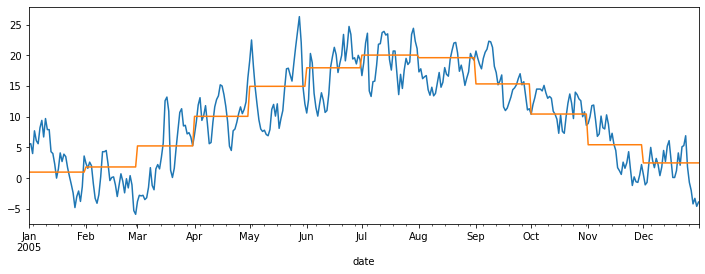

In [37]:
# Zoom in to year 2005
# Bsseline model prediction updated seasonality included (the trend in orange)
fig, ax = plt.subplots(figsize=(12, 4))
df_train['temp'].loc['2005'].plot(ax=ax)
df_train['trend_seasonal'].loc['2005'].plot(ax=ax)

Here

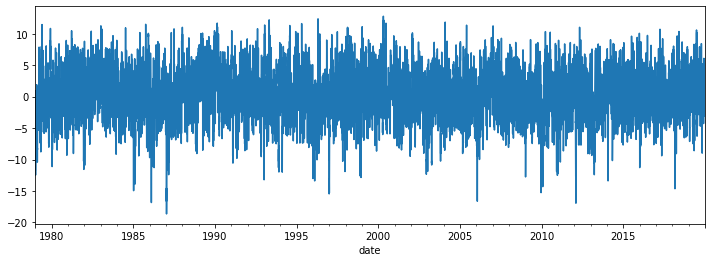

In [38]:
# remainder for all data
df_train['remainder'] = df_train['temp'] - df_train['trend_seasonal']
fig, ax = plt.subplots(figsize=(12, 4))
df_train['remainder'].plot(ax=ax)

In [39]:
df_train.head()

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder
date,,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,1,0,0,0,1,0,0,0,0,0,0,0,-0.228877,-11.671123
1979-01-02,-9.3,1,9.119284,1,0,0,0,1,0,0,0,0,0,0,0,-0.228750,-9.071250
1979-01-03,-7.8,2,9.119419,1,0,0,0,1,0,0,0,0,0,0,0,-0.228624,-7.571376
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0,-0.228497,-9.371503
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0,-0.228371,-9.671629


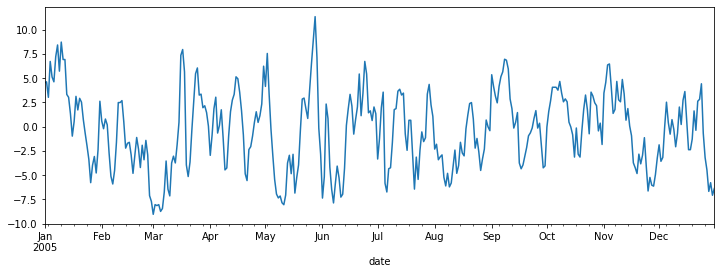

In [40]:
# Zoom in to year 2005
fig, ax = plt.subplots(figsize=(12, 4))
df_train['remainder'].loc['2005'].plot(ax=ax)

In [41]:
df_train['remainder'].to_csv('basline_with_seasonality_remainder.csv')

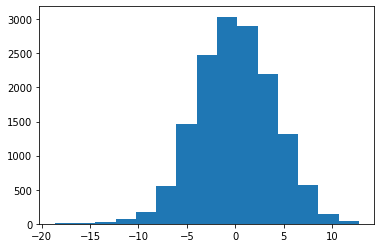

In [42]:
# plotting the distribution of the remainder

plt.hist(df_train['remainder'], bins=15)

plt.show()

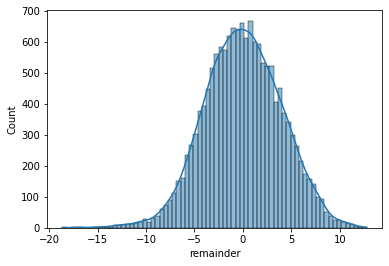

In [43]:
sns.histplot(df_train['remainder'], kde=True)

plt.show()

In [44]:
df_train['remainder'].std(), df_train['remainder'].mean()

(3.956932097532598, 1.712894341298138e-16)

In [45]:
# plot and compare with a random signal
df_train['random'] = np.random.normal(loc=0, scale=4, size=df_train.shape[0]) # loc=mean , scale=std 

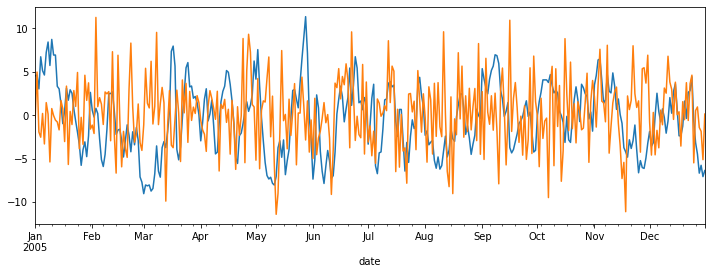

In [46]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(12, 4))
df_train['remainder'].loc['2005'].plot(ax=ax)
df_train['random'].loc['2005'].plot(ax=ax)

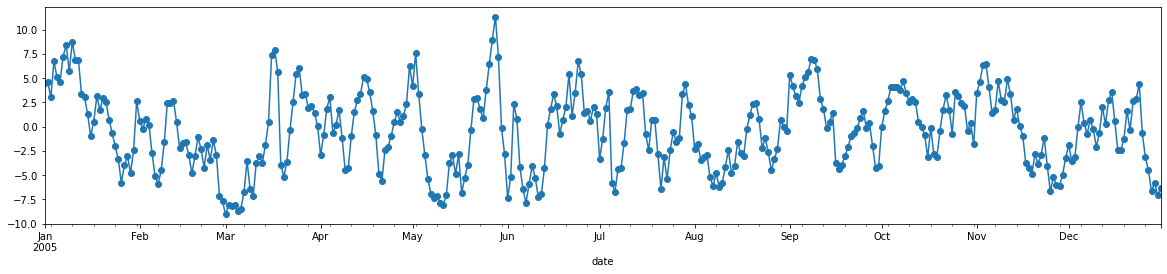

In [47]:
# only remainder visualized 
fig, ax = plt.subplots(figsize=(20, 4))
df_train['remainder'].loc['2005'].plot(ax=ax , marker='o')
plt.show()

# **Checking for time dependancy in remainder data**

---



**Creating time lag**

In [48]:
# make new dataframe from df
remainder = df_train[['remainder']].copy()
remainder.head()

,remainder
date,
1979-01-01,-11.671123
1979-01-02,-9.071250
1979-01-03,-7.571376
1979-01-04,-9.371503
1979-01-05,-9.671629


In [49]:
remainder['lag1'] = remainder.shift(1) # shifting by one step == day
remainder.head()

,remainder,lag1
date,,
1979-01-01,-11.671123,NaN
1979-01-02,-9.071250,-11.671123
1979-01-03,-7.571376,-9.071250
1979-01-04,-9.371503,-7.571376
1979-01-05,-9.671629,-9.371503


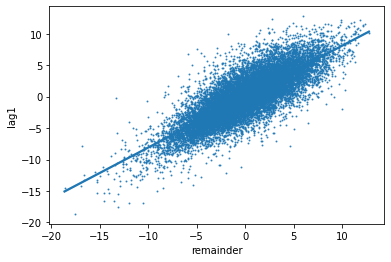

In [50]:
sns.regplot(x = remainder['remainder'], y = remainder['lag1'], fit_reg=True, scatter=True, scatter_kws={"s": 1});
plt.show()

In [51]:
remainder['remainder'].corr(remainder['lag1'])

0.8082367132781609

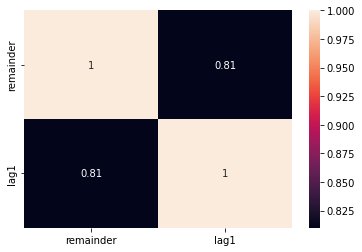

In [52]:
sns.heatmap(round(remainder.corr(), 2), annot=True)
plt.show()

# **Autoregression**

---



In [53]:
remainder.dropna(inplace=True)
remainder.head()

,remainder,lag1
date,,
1979-01-02,-9.071250,-11.671123
1979-01-03,-7.571376,-9.071250
1979-01-04,-9.371503,-7.571376
1979-01-05,-9.671629,-9.371503
1979-01-06,-12.471756,-9.671629


run linear reg model on remainder and lag 

In [54]:
# simply a linear regression
X = remainder[['lag1']]  # only feature is the lagged remainder
y = remainder['remainder']

m_ar = LinearRegression()
m_ar.fit(X, y)
remainder['prediction_ar1'] = m_ar.predict(X)
remainder.head()

,remainder,lag1,prediction_ar1
date,,,
1979-01-02,-9.071250,-11.671123,-9.429521
1979-01-03,-7.571376,-9.071250,-7.328781
1979-01-04,-9.371503,-7.571376,-6.116859
1979-01-05,-9.671629,-9.371503,-7.571391
1979-01-06,-12.471756,-9.671629,-7.813898


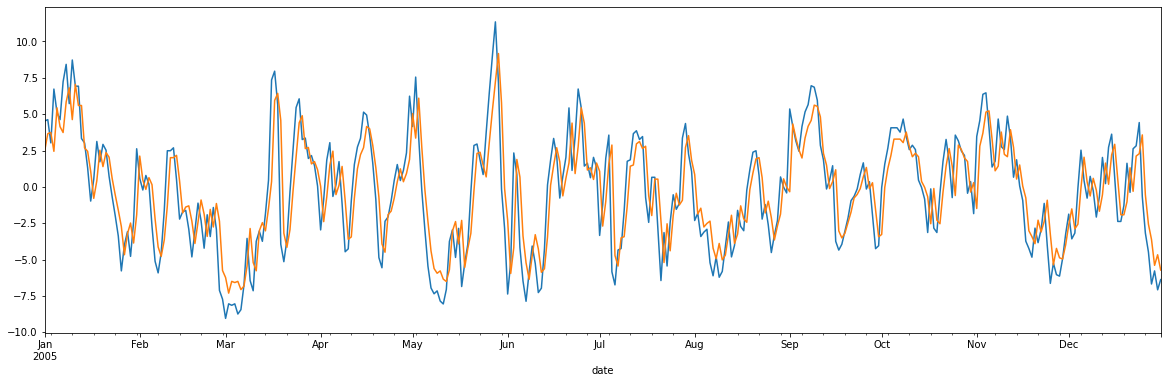

In [55]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(20, 6))
remainder['remainder'].loc['2005'].plot(ax=ax)
remainder['prediction_ar1'].loc['2005'].plot(ax=ax)

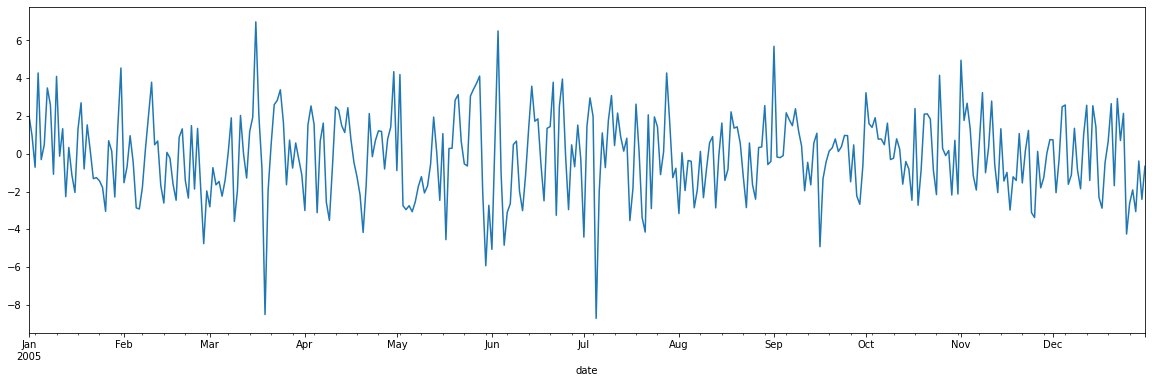

In [56]:
# residuals of this ar1 model 

remainder['residual'] = remainder['remainder'] - remainder['prediction_ar1']

fig, ax = plt.subplots(figsize=(20, 6))
remainder['residual'].loc['2005'].plot(ax=ax)


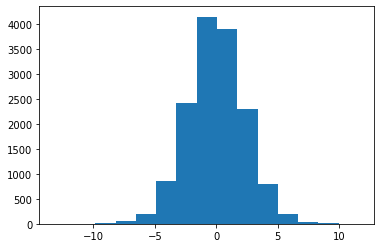

In [57]:
plt.hist(remainder['residual'], bins=15)
plt.show()

In [58]:
remainder['residual'].mean()

1.416138624972652e-17

## **Check if one lag is enough**

---



In [59]:
remainder['lag2'] = remainder['lag1'].shift(1)
remainder.head()

,remainder,lag1,prediction_ar1,residual,lag2
date,,,,,
1979-01-02,-9.071250,-11.671123,-9.429521,0.358271,NaN
1979-01-03,-7.571376,-9.071250,-7.328781,-0.242595,-11.671123
1979-01-04,-9.371503,-7.571376,-6.116859,-3.254643,-9.071250
1979-01-05,-9.671629,-9.371503,-7.571391,-2.100239,-7.571376
1979-01-06,-12.471756,-9.671629,-7.813898,-4.657858,-9.371503


In [60]:
remainder['remainder'].corr(remainder['lag2'])

0.6017365424130612

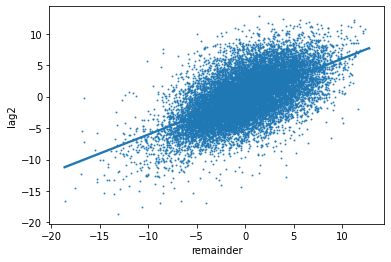

In [61]:
sns.regplot(x = remainder['remainder'], y = remainder['lag2'], fit_reg=True, scatter=True, scatter_kws={"s": 1});
plt.show()

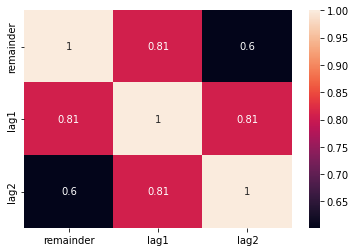

In [62]:
sns.heatmap(round(remainder[['remainder', 'lag1', 'lag2']].corr(), 4), annot=True)
plt.show()

In [63]:
# see if the lag 2 is an echo of the previous lag (if corr_(lag1)*corr_(lag1) --> corr_(lag2) --> it is an echo)
0.81*0.81

0.6561000000000001

Anothe method (Box-Jenkins)

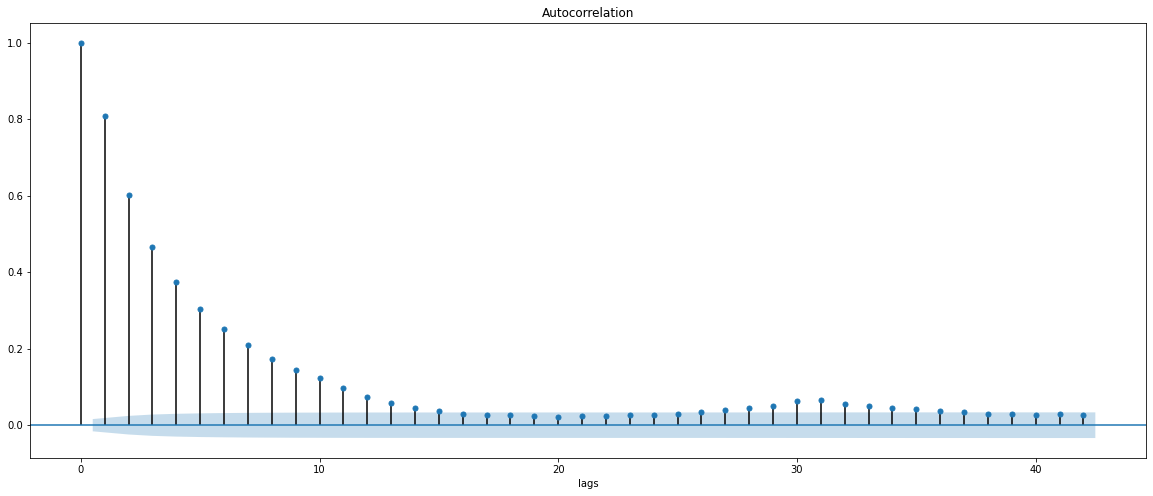

In [64]:
# we can plot auto-correlation with stats model

from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(20, 8))
plot_acf(remainder['remainder'], ax=ax)
plt.xlabel('lags');

plt.show()

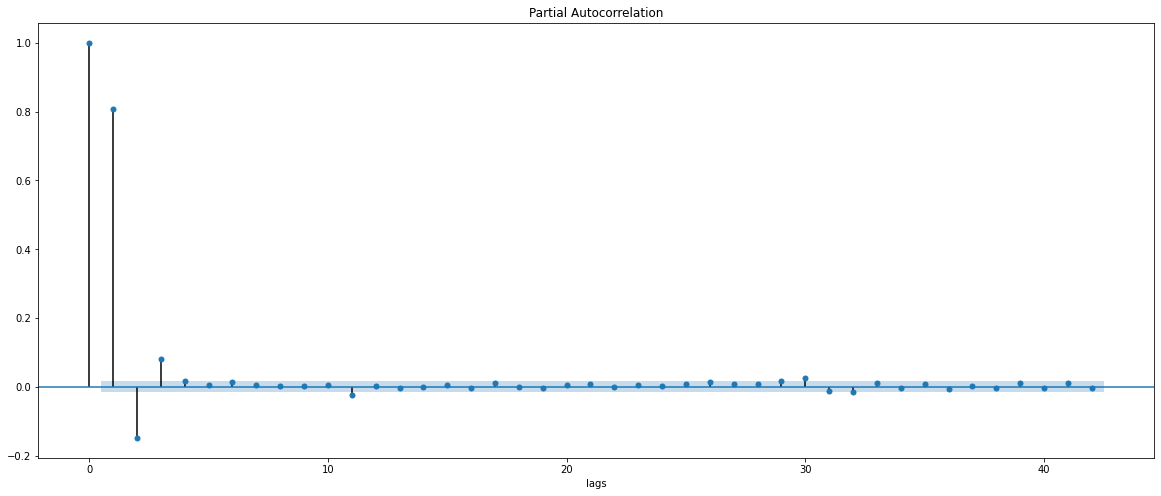

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(20, 8))
plot_pacf(remainder['remainder'], ax=ax)
plt.xlabel('lags');

plt.show()

Another method


---



In [66]:
# to include AutoReg version below 13 is needed
!pip install statsmodels==0.12

In [67]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [68]:
# inputs are time series as a pandas series and a max lag
selected_order = ar_select_order(remainder['remainder'], maxlag = 12) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [69]:
selected_order.ar_lags

array([1, 2, 3])

In [70]:
stats_ar1 = AutoReg(remainder['remainder'], lags=3).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


In [71]:
stats_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                14974
Model:                     AutoReg(3)   Log Likelihood              -33686.186
Method:               Conditional MLE   S.D. of innovations              2.296
Date:                Thu, 27 Jan 2022   AIC                              1.663
Time:                        11:28:01   BIC                              1.666
Sample:                    01-05-1979   HQIC                             1.664
                         - 12-31-2019                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.0011      0.019      0.059      0.953      -0.036       0.038
remainder.L1     0.9400      0.008    115.410      0.000       0.924       0.956
remainder.L2    -0.2241      0.011    -20.290      0.000      -0.246      -0.202
remainder.L3     0.0815      0.008     10.005      0.000       0.066       0.097
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2710           -0.0000j            1.2710           -0.0000
AR.2            0.7397           -3.0180j            3.1073           -0.2117
AR.3            0.7397           +3.0180j            3.1073            0.2117
-----------------------------------------------------------------------------
"""

In [72]:
remainder['prediction_ar3']=stats_ar1.predict()
remainder.head()

,remainder,lag1,prediction_ar1,residual,lag2,prediction_ar3
date,,,,,,
1979-01-02,-9.071250,-11.671123,-9.429521,0.358271,NaN,NaN
1979-01-03,-7.571376,-9.071250,-7.328781,-0.242595,-11.671123,NaN
1979-01-04,-9.371503,-7.571376,-6.116859,-3.254643,-9.071250,NaN
1979-01-05,-9.671629,-9.371503,-7.571391,-2.100239,-7.571376,-7.850518
1979-01-06,-12.471756,-9.671629,-7.813898,-4.657858,-9.371503,-7.606964


In [73]:
# residuals of this ar1 model 

remainder['residual_arg3'] = remainder['remainder'] - remainder['prediction_ar3']
remainder.head()

,remainder,lag1,prediction_ar1,residual,lag2,prediction_ar3,residual_arg3
date,,,,,,,
1979-01-02,-9.071250,-11.671123,-9.429521,0.358271,NaN,NaN,NaN
1979-01-03,-7.571376,-9.071250,-7.328781,-0.242595,-11.671123,NaN,NaN
1979-01-04,-9.371503,-7.571376,-6.116859,-3.254643,-9.071250,NaN,NaN
1979-01-05,-9.671629,-9.371503,-7.571391,-2.100239,-7.571376,-7.850518,-1.821111
1979-01-06,-12.471756,-9.671629,-7.813898,-4.657858,-9.371503,-7.606964,-4.864791


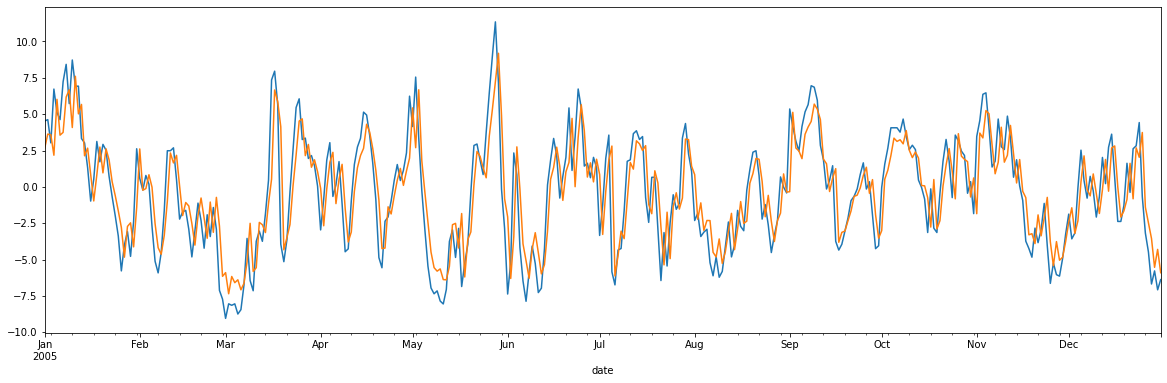

In [74]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(20, 6))
remainder['remainder'].loc['2005'].plot(ax=ax)
remainder['prediction_ar3'].loc['2005'].plot(ax=ax)

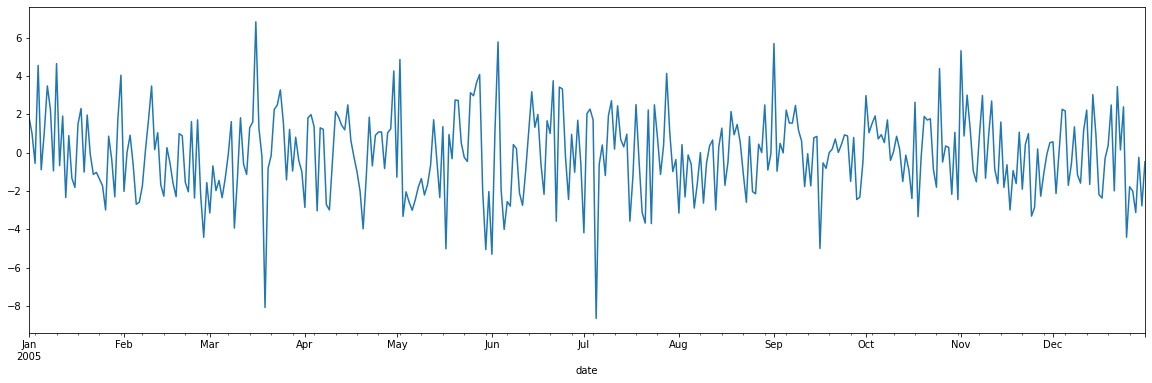

In [75]:
# residuals of this ar3 model 

fig, ax = plt.subplots(figsize=(20, 6))
remainder['residual_arg3'].loc['2005'].plot(ax=ax)

**Conclusion : 3 shifts (lags are to be included in the features)**

---

Inserting lags into df as features:

In [76]:
df_train.head() 

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,random
date,,,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,1,0,0,0,1,0,0,0,0,0,0,0,-0.228877,-11.671123,-3.674115
1979-01-02,-9.3,1,9.119284,1,0,0,0,1,0,0,0,0,0,0,0,-0.228750,-9.071250,2.327580
1979-01-03,-7.8,2,9.119419,1,0,0,0,1,0,0,0,0,0,0,0,-0.228624,-7.571376,0.199279
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0,-0.228497,-9.371503,0.201951
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0,-0.228371,-9.671629,-3.306756


add in lags

In [77]:
df_train['lag1'] = df_train['remainder'].shift(1)
df_train['lag2'] = df_train['lag1'].shift(1)
df_train['lag3'] = df_train['lag2'].shift(1)
df_train.head()

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,random,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,-11.9,0,9.119150,1,0,0,0,1,0,0,0,0,0,0,0,-0.228877,-11.671123,-3.674115,NaN,NaN,NaN
1979-01-02,-9.3,1,9.119284,1,0,0,0,1,0,0,0,0,0,0,0,-0.228750,-9.071250,2.327580,-11.671123,NaN,NaN
1979-01-03,-7.8,2,9.119419,1,0,0,0,1,0,0,0,0,0,0,0,-0.228624,-7.571376,0.199279,-9.071250,-11.671123,NaN
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0,-0.228497,-9.371503,0.201951,-7.571376,-9.071250,-11.671123
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0,-0.228371,-9.671629,-3.306756,-9.371503,-7.571376,-9.071250


In [78]:
df_train.dropna(inplace=True)

In [79]:
X = df_train.drop(['temp','trend', 'month', 'trend_seasonal','remainder', 'random' ], axis=1)
y = df_train['temp']

m_full = LinearRegression()

In [80]:
# train model and add predictions on training data

m_full.fit(X,y)

df_train['predictions_full'] = m_full.predict(X)
df_train.head()

,temp,timestep,trend,month,August,December,February,January,July,June,March,May,November,October,September,trend_seasonal,remainder,random,lag1,lag2,lag3,predictions_full
date,,,,,,,,,,,,,,,,,,,,,,
1979-01-04,-9.6,3,9.119554,1,0,0,0,1,0,0,0,0,0,0,0,-0.228497,-9.371503,0.201951,-7.571376,-9.071250,-11.671123,-6.233300
1979-01-05,-9.9,4,9.119689,1,0,0,0,1,0,0,0,0,0,0,0,-0.228371,-9.671629,-3.306756,-9.371503,-7.571376,-9.071250,-8.048371
1979-01-06,-12.7,5,9.119824,1,0,0,0,1,0,0,0,0,0,0,0,-0.228244,-12.471756,-2.853478,-9.671629,-9.371503,-7.571376,-7.803920
1979-01-07,-5.4,6,9.119959,1,0,0,0,1,0,0,0,0,0,0,0,-0.228118,-5.171882,-0.415793,-12.471756,-9.671629,-9.371503,-10.516052
1979-01-08,0.5,7,9.120094,1,0,0,0,1,0,0,0,0,0,0,0,-0.227991,0.727991,-0.693257,-5.171882,-12.471756,-9.671629,-3.051245


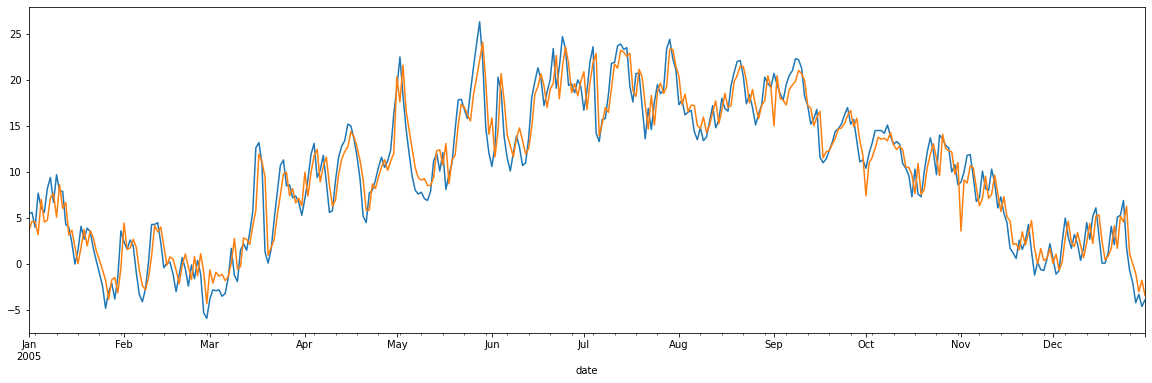

In [81]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(20, 6))
df_train['temp'].loc['2005'].plot(ax=ax)
df_train['predictions_full'].loc['2005'].plot(ax=ax)

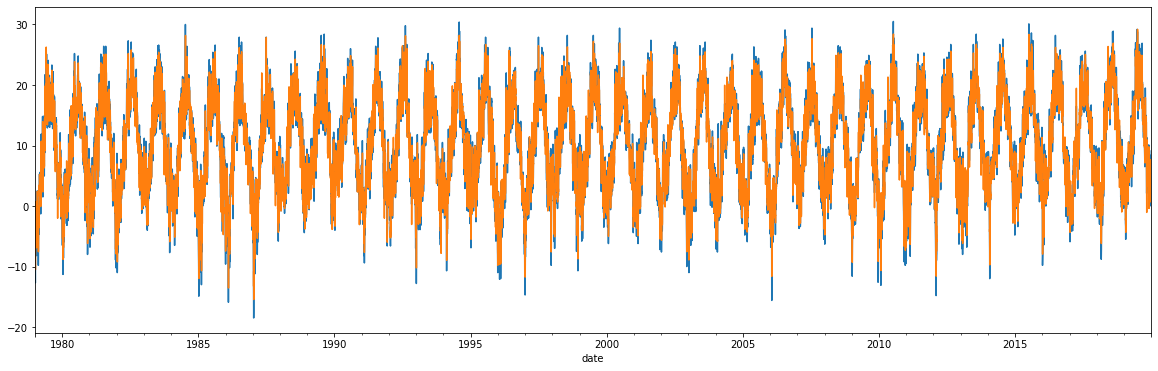

In [82]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(20, 6))
df_train['temp'].plot(ax=ax)
df_train['predictions_full'].plot(ax=ax)

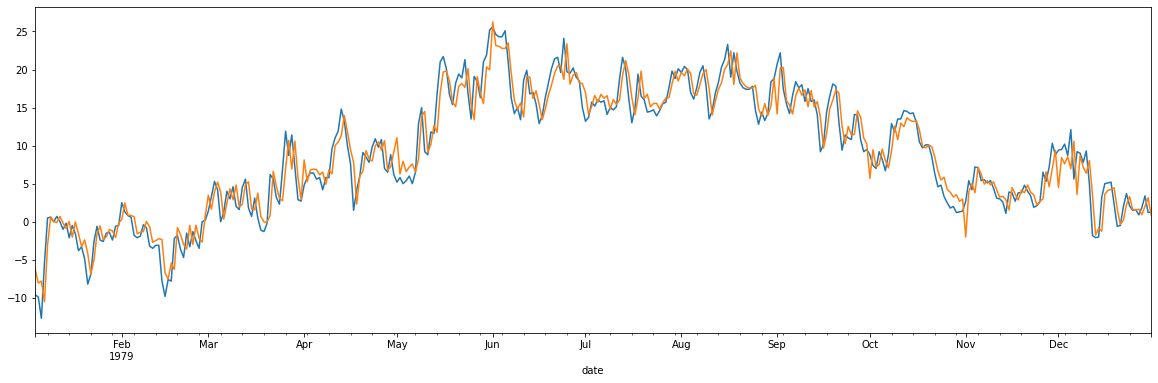

In [83]:
# remainder of seasonal trend and random noise
fig, ax = plt.subplots(figsize=(20, 6))
df_train['temp'].loc['1979'].plot(ax=ax)
df_train['predictions_full'].loc['1979'].plot(ax=ax)

In [84]:
X.head()

,timestep,August,December,February,January,July,June,March,May,November,October,September,lag1,lag2,lag3
date,,,,,,,,,,,,,,,
1979-01-04,3,0,0,0,1,0,0,0,0,0,0,0,-7.571376,-9.071250,-11.671123
1979-01-05,4,0,0,0,1,0,0,0,0,0,0,0,-9.371503,-7.571376,-9.071250
1979-01-06,5,0,0,0,1,0,0,0,0,0,0,0,-9.671629,-9.371503,-7.571376
1979-01-07,6,0,0,0,1,0,0,0,0,0,0,0,-12.471756,-9.671629,-9.371503
1979-01-08,7,0,0,0,1,0,0,0,0,0,0,0,-5.171882,-12.471756,-9.671629


In [85]:
# extracting full model coefficients after the training 

pd.DataFrame(m_full.coef_.reshape(1,15), columns=X.columns)

,timestep,August,December,February,January,July,June,March,May,November,October,September,lag1,lag2,lag3
0,0.000126,9.466276,-7.575115,-8.208368,-9.047272,9.968036,7.858448,-4.78498,4.846248,-4.66106,0.333596,5.245475,0.939962,-0.22416,0.081951


# **Evaluating model** 

In [86]:
# Create a TimeSeriesSplit object
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import r2_score

ts_split = TimeSeriesSplit(n_splits=5) # instanciate the class and give the k as input
time_cv = ts_split.split(X, y) # this is a python generator

In [87]:
# cross validate model and read scores 
time_cv = ts_split.split(X, y)

estimator = LinearRegression() # instanciate 

r_squared_scores = cross_val_score(estimator=estimator, X=X, y=y, cv=time_cv )

print(r_squared_scores)
print(r_squared_scores.mean())

[0.90339813 0.90198567 0.92369542 0.92220481 0.91854607]
0.9139660203298015
